# MNIST

### fetch mnist

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [90]:
X, y = mnist['data'], mnist['target']

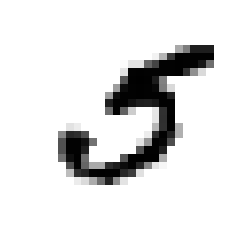

In [91]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

some_digit = X[36000]

some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [127]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [128]:
import numpy as np

shuffled_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_idx], y[shuffled_idx]

## Binary classifier

In [129]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [130]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=-np.infty)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
sgd_clf.predict([some_digit])

array([False])

### Binary classifier performanse

#### Cross-val

In [132]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9613 , 0.9451 , 0.95465])

In [133]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [134]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90905, 0.9087 , 0.9112 ])

#### Confusion matrix

In [135]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53564,  1015],
       [ 1764,  3657]])

#### Precession and recall

In [16]:
from sklearn.metrics import precision_score, recall_score

In [137]:
precision_score(y_train_5, y_train_pred)

0.7827482876712328

In [138]:
recall_score(y_train_5, y_train_pred)

0.6745987825124515

In [139]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7246606559001287

In [140]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [141]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

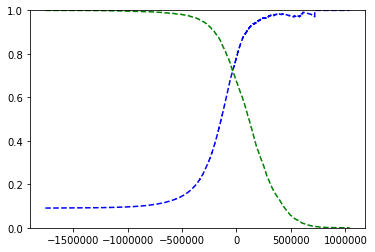

In [142]:
def plot_precision_recall_vs_thr(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label='prec')
    plt.plot(thresholds, recall[:-1], 'g--', label='rec')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_thr(precision, recall, thresholds)
plt.show()

In [143]:
y_train_pred_90 = (y_scores > 70000)

In [144]:
precision_score(y_train_5, y_train_pred_90)

0.8827020915771623

In [145]:
recall_score(y_train_5, y_train_pred_90)

0.576092971776425

In [146]:
sgd_clf.decision_function([some_digit])

array([-24438.5478405])

#### ROC curve

In [147]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y_train_5, y_scores)

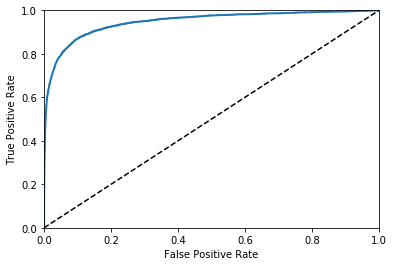

In [148]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [149]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9471221005513386

#### Random Forest Classifienr

In [150]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_score = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [151]:
y_scores_forest = y_probas_score[:, 1]
fpr_forest, tpr_forest, thr_forest = roc_curve(y_train_5, y_scores_forest)

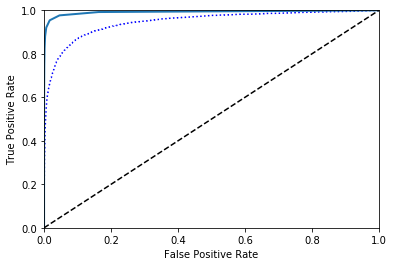

In [152]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.show()

In [153]:
roc_auc_score(y_train_5, y_scores_forest)

0.9923135708482036

In [154]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [155]:
precision_score(y_train_5, y_train_pred_forest)

0.982001755926251

In [156]:
recall_score(y_train_5, y_train_pred_forest)

0.8253089835823649

# Multiclass classifier

In [157]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [158]:
sgd_clf.predict([some_digit])

array([5.])

In [159]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-111032.20828357, -499192.20881738, -339528.08821066,
        -147623.82053763, -537703.1745453 ,  -24438.5478405 ,
        -617459.11129373, -434692.26074898, -754652.03335561,
        -764464.88778665]])

In [160]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5, tol=-np.infty))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [161]:
ovo_clf.predict([some_digit])

array([5.])

In [162]:
len(ovo_clf.estimators_)

45

In [163]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [164]:
forest_clf.predict([some_digit])

array([5.])

In [165]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [166]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87057588, 0.83854193, 0.85742861])

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [168]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91161768, 0.9080454 , 0.90978647])

# Error Analysis

In [169]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [170]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [171]:
conf_mx

array([[5739,    4,   20,   11,   10,   44,   49,    8,   36,    2],
       [   2, 6443,   50,   29,    5,   40,    9,   11,  141,   12],
       [  55,   35, 5323,   96,   83,   24,   99,   56,  169,   18],
       [  45,   35,  139, 5341,    2,  238,   35,   51,  145,  100],
       [  18,   23,   33,   11, 5365,    8,   58,   30,   80,  216],
       [  69,   40,   31,  176,   66, 4610,  113,   24,  190,  102],
       [  37,   20,   43,    2,   45,   84, 5632,    5,   49,    1],
       [  25,   19,   65,   27,   51,   10,    7, 5806,   17,  238],
       [  49,  136,   71,  150,   15,  160,   62,   24, 5048,  136],
       [  38,   25,   26,   91,  171,   39,    3,  199,   75, 5282]])

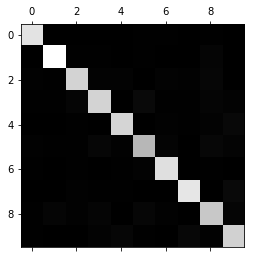

In [172]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [173]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

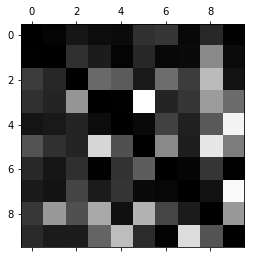

In [174]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification 

In [175]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [176]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# takes too long time on cpu 

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=2, verbose=2)

In [ ]:
f1_score(y_train, y_train_knn_pred, average='macro')

# Multioutput Classification

In [177]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [178]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    #plt.axis("off")

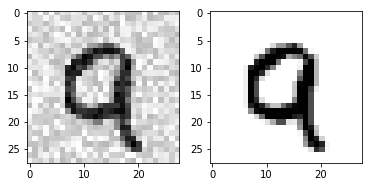

In [179]:
plt.subplot(1,2,1)
plot_digit(X_train_mod[36001])
plt.subplot(1,2,2)
plot_digit(y_train_mod[36001])

In [180]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

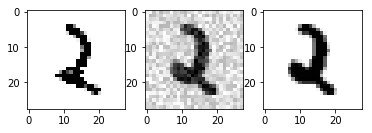

In [182]:
clean_digit = knn_clf.predict([X_test_mod[3000]])
plt.subplot(1, 3, 1)
plot_digit(clean_digit)
plt.subplot(1,3,2)
plot_digit(X_test_mod[3000])
plt.subplot(1,3,3)
plot_digit(y_test_mod[3000])

# Exercises

## Ex 1: train mnist classifier w/ 97+% accuracy

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1, 5, 10, 30]
}]

knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, param_grid, cv=3)

Следующая ячейка должна натренировать классификотор с точностью > 0.97, но ее слишком долго исполнять на cpu

In [67]:
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

## Ex 2: Shift mnist image

In [216]:
def shift(img):
    if img.shape[0] == 784:
        img = img.reshape(28, 28)
        
    # output array
    out = np.ndarray((4, 784))
    
    # shift up
    buf = np.zeros(img.shape)
    
    for i in range(0, 27):
        buf[i] = img[i+1]
    out[0] = buf.reshape((784,))
    
    # shift down
    buf = np.zeros(img.shape)
    for i in range(1, 28):
        buf[i] = img[i-1]
    out[1] = buf.reshape((784,))
    
    # shift right
    buf = np.zeros(img.shape)
    for i in range(1, 28):
        buf[:, i] = img[:, i-1]
    out[2] = buf.reshape((784,))
    
    # shift left
    buf = np.zeros(img.shape)
    for i in range(0, 27):
        buf[:, i] = img[:, i+1]
    out[3] = buf.reshape((784,))
    
    return out

In [257]:
def aug_data(samples, labels):
    out_samples = [sample for sample in samples]
    out_labels = [label for label in labels]
    
    for idx, (sample, label) in enumerate(zip(samples, labels)):
        shifted = shift(sample)
        for img in shifted:
            out_samples.append(img)
            out_labels.append(label)
    return out_samples, out_labels

X_train_aug, y_train_aug = aug_data(X_train_scaled, y_train)

In [266]:
cross_val_score(forest_clf, X_train_aug, y_train_aug, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.9min finished


array([0.95276142, 0.94841052, 0.94783791])

In [265]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished


array([0.94231154, 0.940097  , 0.93969095])

In [277]:
param_grid = [{
    'n_estimators': [10, 100, 500],
    'max_features': [10, 20, 30]
}]

grd_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [ ]:
grd_search.fit(X_train_aug, y_train_aug)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [271]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.2137

In [ ]:
clf = forest_clf

# Titanic 

In [12]:
import pandas as pd

df = pd.read_csv('./datasets/titanic/train.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
df['Embarked'] = df['Embarked'].fillna('S')

In [77]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.925,S
3,1,1,female,35,1,0,53.1,S
4,0,3,male,35,0,0,8.05,S


In [115]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
corr_matrix = df.corr()
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

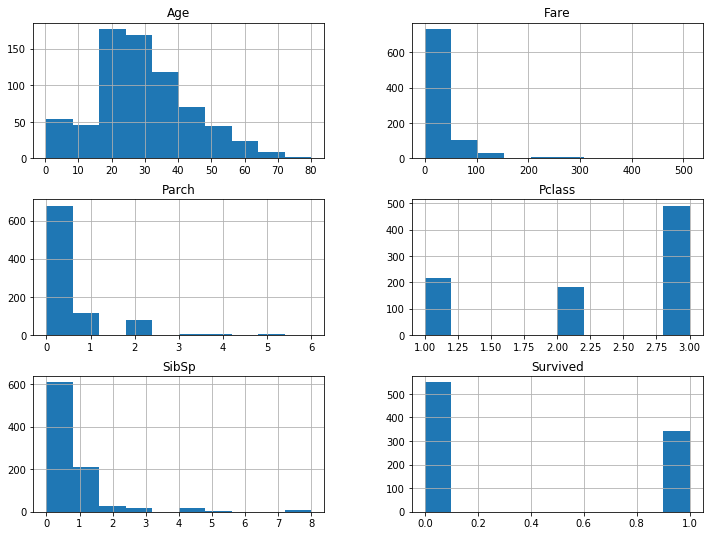

In [13]:
from matplotlib import pyplot as plt

df.hist(figsize=(12,9))
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_idx, test_idx in split.split(df, df['Survived']):
    train_set = df.iloc[train_idx]
    test_set = df.iloc[test_idx]

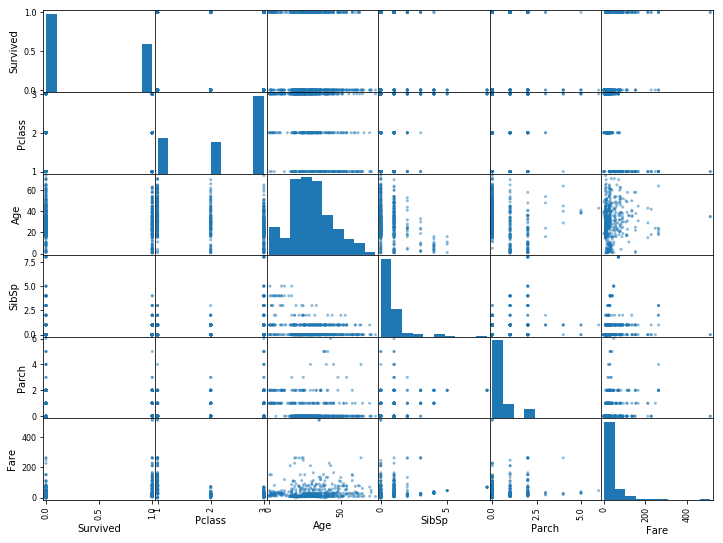

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 9))
plt.show()

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attr_names):
        self.attr_names = attr_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attr_names].values

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
    ('onehot', OneHotEncoder())
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [18]:
X_train = train_set.drop(columns=['Survived'])
y_train = train_set['Survived']

In [19]:
X_train = full_pipeline.fit_transform(X_train)

In [20]:
X_test = test_set.drop(columns=['Survived'])
y_test = test_set['Survived']

X_test = full_pipeline.fit_transform(X_test)

In [21]:
X_test

<179x12 sparse matrix of type '<class 'numpy.float64'>'
	with 994 stored elements in Compressed Sparse Row format>

In [121]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
y_pred = tree_clf.predict(X_test)

In [123]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7022900763358778

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [125]:
y_pred = knn_clf.predict(X_test)
f1_score(y_test, y_pred)

0.671875

In [131]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [132]:
y_pred = forest_clf.predict(X_test)
f1_score(y_test, y_pred)

0.7586206896551724

In [129]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8019081153588197

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [100, 150]
}]

grd_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [138]:
grd_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [100, 150]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [142]:
grd_search.best_score_

-0.20646067415730338

In [143]:
est = grd_search.best_estimator_

In [144]:
y_pred = est.predict(X_test)
f1_score(y_test, y_pred)

0.7638888888888887

### submit titanic 

In [74]:
df_subm = pd.read_csv('./datasets/titanic/test.csv')
pass_id = df_subm['PassengerId']

In [75]:
df_subm = full_pipeline.fit_transform(df_subm)
df_subm

<418x12 sparse matrix of type '<class 'numpy.float64'>'
	with 2317 stored elements in Compressed Sparse Row format>

In [76]:
preds = model.predict_classes(df_subm)

In [77]:
d = {'PassengerId': pass_id.values, 'Survived': preds}
subm = pd.DataFrame(d)
subm = subm.set_index('PassengerId')

In [78]:
subm.to_csv('titanic_subm.csv')

In [169]:
!ls

Classification (Chapter 3).ipynb datasets
Housing (Chapter 2).ipynb        titanic_subm.csv


In [173]:
subm

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


### keras 

In [22]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [87]:
def create_model(inp_shape):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(inp_shape,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

In [45]:
from keras.utils import np_utils

y_train_ = np_utils.to_categorical(y_train, 2)

In [25]:
y_train

241    1
39     1
177    0
131    0
824    0
6      0
184    1
817    0
838    1
516    1
495    0
294    0
415    0
866    1
388    0
789    0
220    1
153    0
653    1
172    1
636    0
237    1
641    1
197    0
600    1
867    0
788    1
509    1
347    1
694    0
      ..
744    1
806    0
291    1
514    0
676    0
882    0
321    0
323    1
297    0
196    0
282    0
194    1
734    0
793    0
646    0
62     0
473    1
143    0
702    0
314    0
391    1
68     1
176    0
785    0
235    0
743    0
225    0
664    1
334    1
181    0
Name: Survived, Length: 712, dtype: int64

In [90]:
model = create_model(X_train.shape[1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train_, validation_split=0.2, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_80 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_81 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 64)                4160      
__________

Epoch 51/100
569/569 [==============================] - 0s 122us/step - loss: 0.3985 - acc: 0.8207 - val_loss: 0.5118 - val_acc: 0.7762
Epoch 52/100
569/569 [==============================] - 0s 123us/step - loss: 0.3862 - acc: 0.8225 - val_loss: 0.4980 - val_acc: 0.7902
Epoch 53/100
569/569 [==============================] - 0s 110us/step - loss: 0.3698 - acc: 0.8243 - val_loss: 0.5383 - val_acc: 0.8042
Epoch 54/100
569/569 [==============================] - 0s 111us/step - loss: 0.3715 - acc: 0.8313 - val_loss: 0.5641 - val_acc: 0.7832
Epoch 55/100
569/569 [==============================] - 0s 121us/step - loss: 0.3694 - acc: 0.8313 - val_loss: 0.5132 - val_acc: 0.8042
Epoch 56/100
569/569 [==============================] - 0s 112us/step - loss: 0.3607 - acc: 0.8436 - val_loss: 0.5532 - val_acc: 0.7972
Epoch 57/100
569/569 [==============================] - 0s 114us/step - loss: 0.3833 - acc: 0.8190 - val_loss: 0.5755 - val_acc: 0.7692
Epoch 58/100
569/569 [==========================

In [42]:
y_pred = model.predict_classes(X_test)

y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1])

In [91]:
from sklearn.metrics import f1_score
y_pred = model.predict_classes(X_test)
f1_score(y_test, y_pred)

0.7540983606557377